In [1]:
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # statistical plotting functions
sns.color_palette("viridis", as_cmap=True)
import pandas as pd # dataframes like in R
from copy import deepcopy
import numpy as np
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

In [2]:
from mempyDEB.DEBODE.simulators import * # functions to run models
from mempyDEB.DEBODE.defaultparams import * # some default parameter configurations

In [3]:
# automatische aktualisierung externer Python-Dateien
%load_ext IPython.extensions.autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


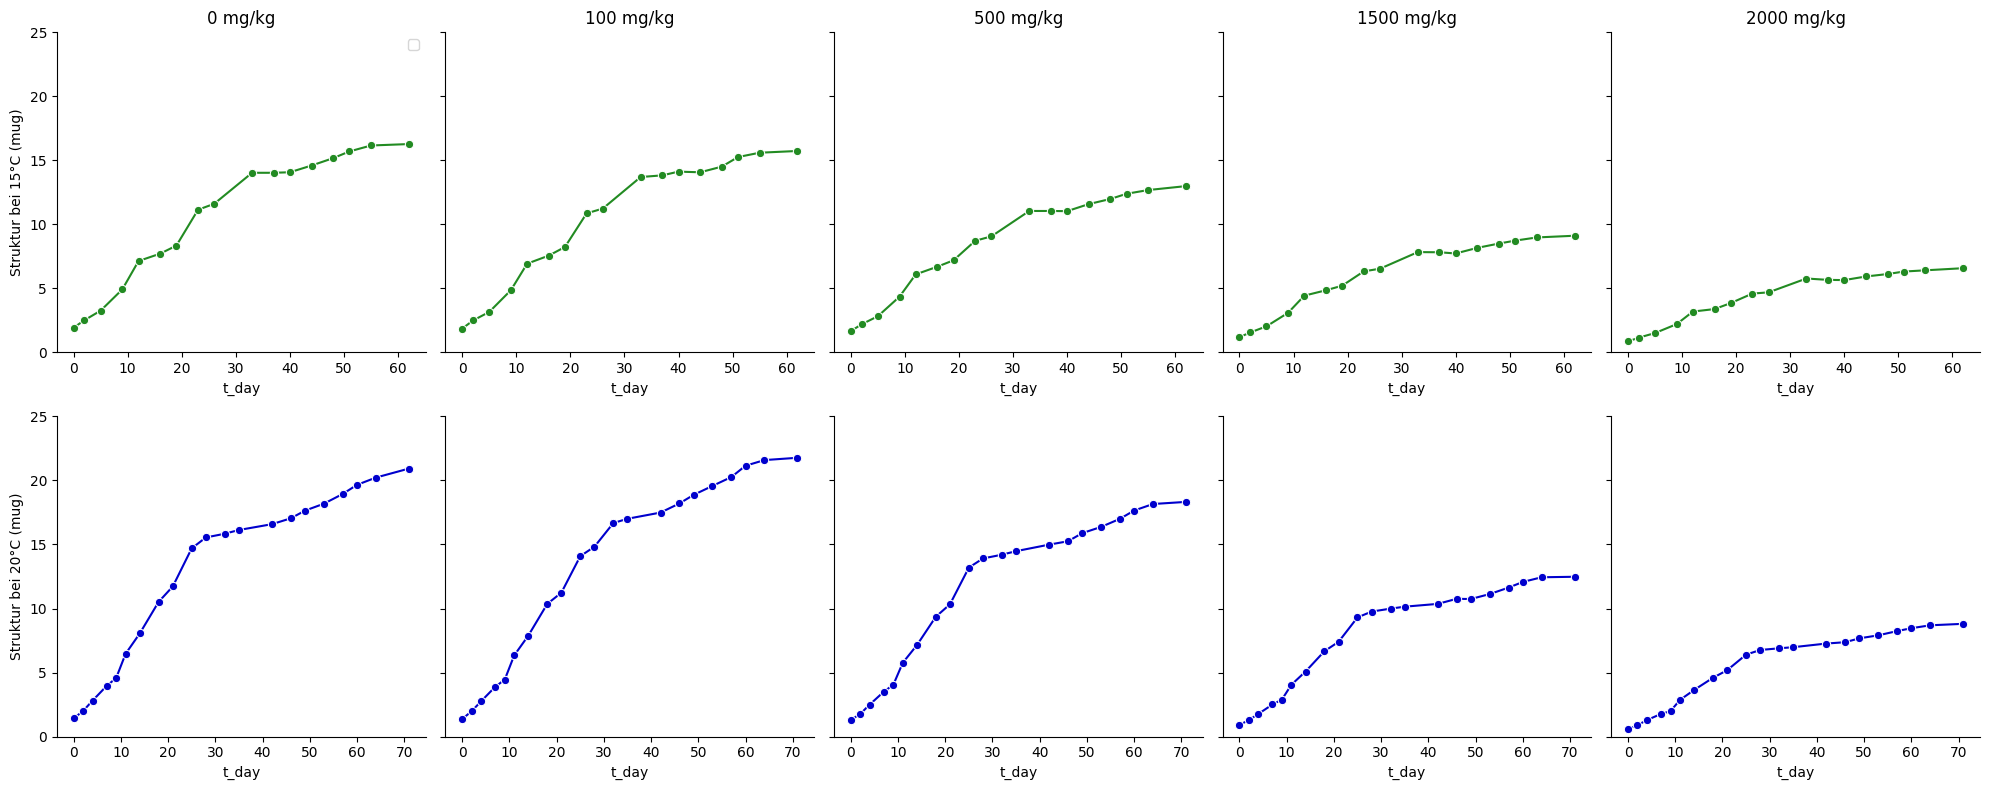

In [4]:
from Ex03_TKTDFitting_Folsomia import *

data = load_data()
_ = plot_data(data)

c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


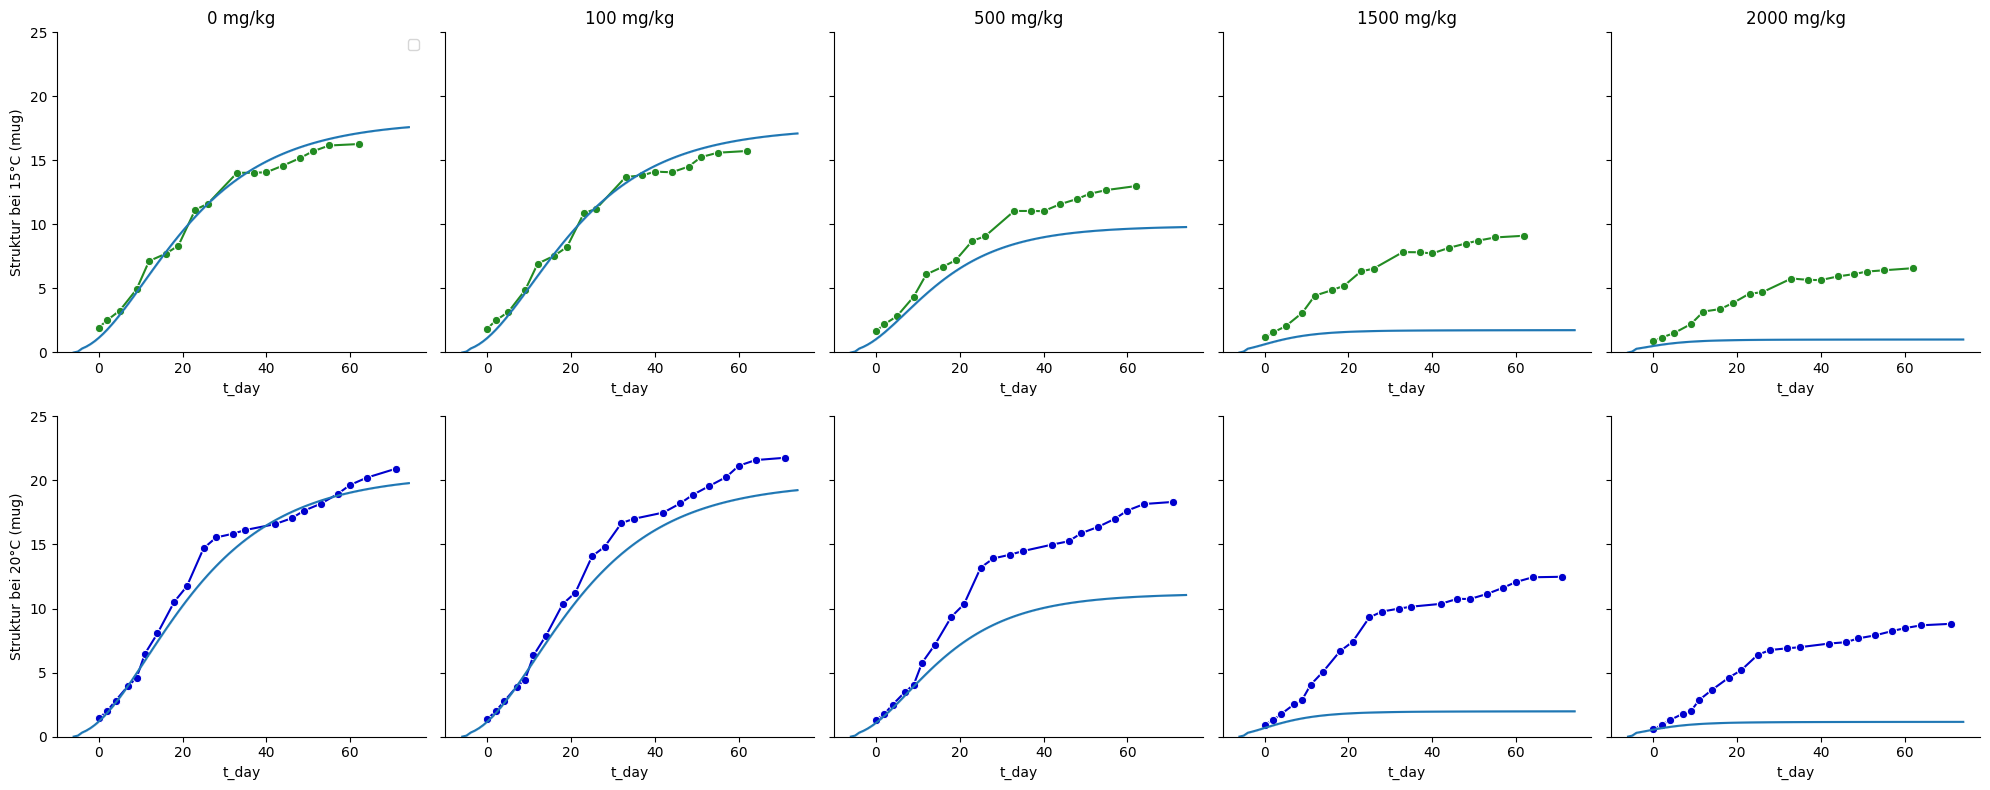

In [13]:
f = setup_modelfit('M')

sim_intguess = f.simulator(f.intguess)
fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_intguess)

Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(1.0), 'ED50_j': np.float64(3040.1002199262807), 'beta_j': np.float64(1.6991583937792876)}


c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


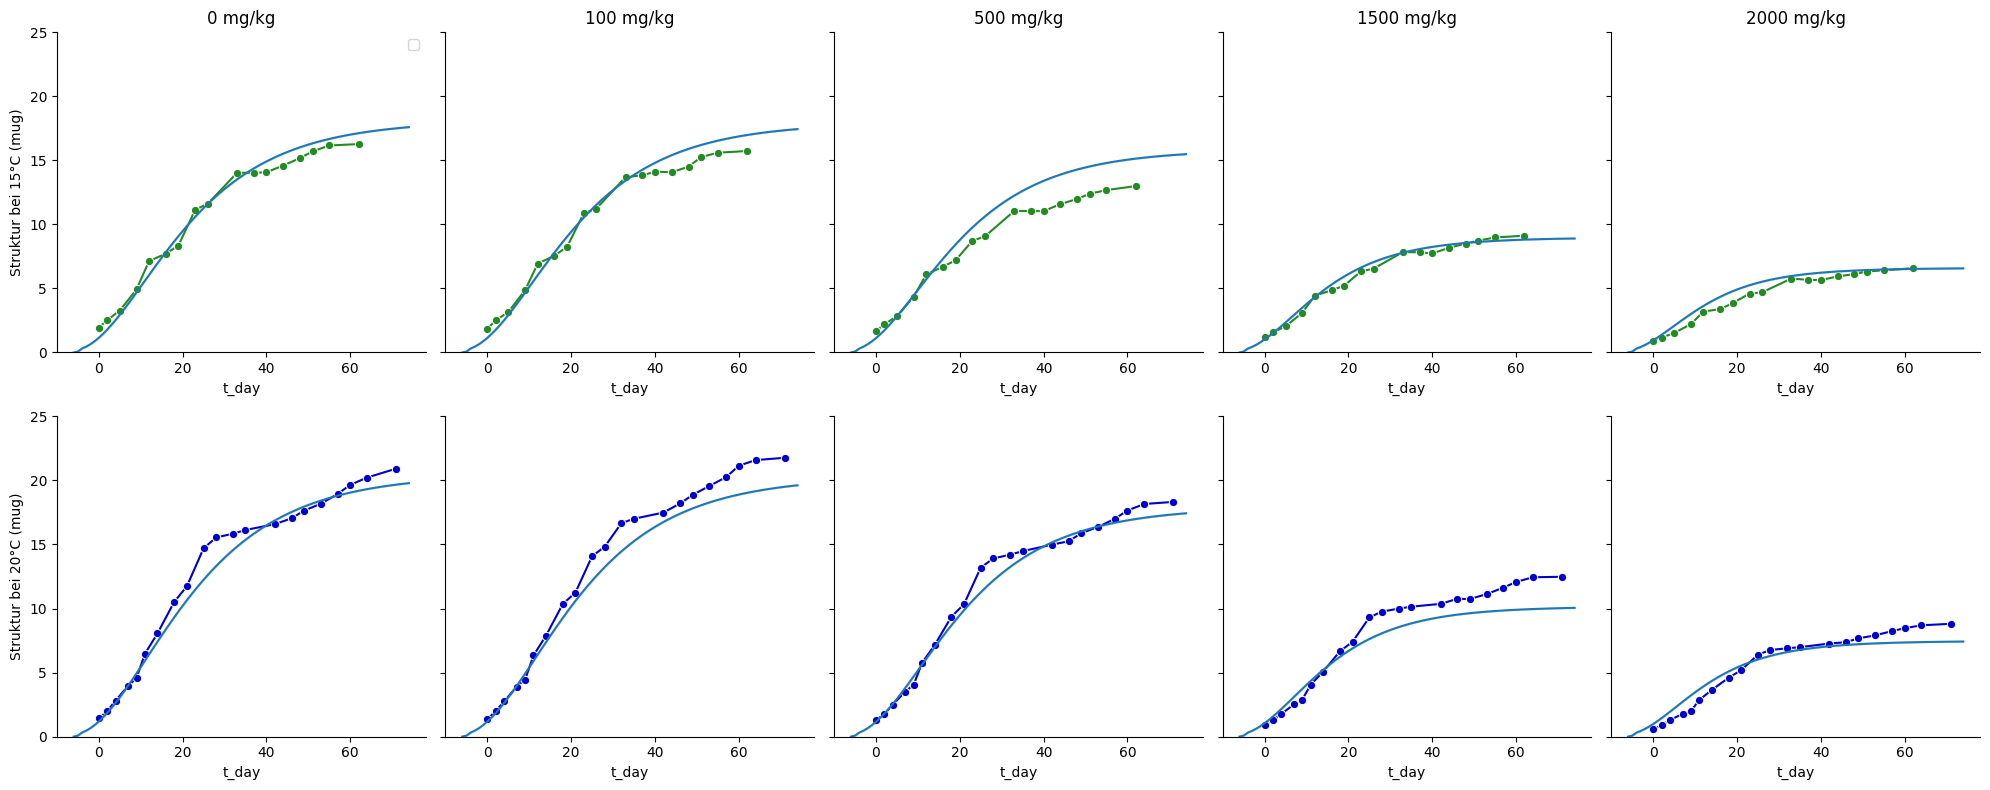

In [6]:
#f = setup_modelfit('M')
f.run_optimization(
    bounds =[(0,1),(1000,10_000),(1,10)], 
    options={'maxiter' : 100}
)

print(f"Estimated parameter values: {f.p_opt}")
p = deepcopy(f.defaultparams)
p.spc.update(f.p_opt)  
sim_opt = f.simulator(p.spc)

fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_opt)

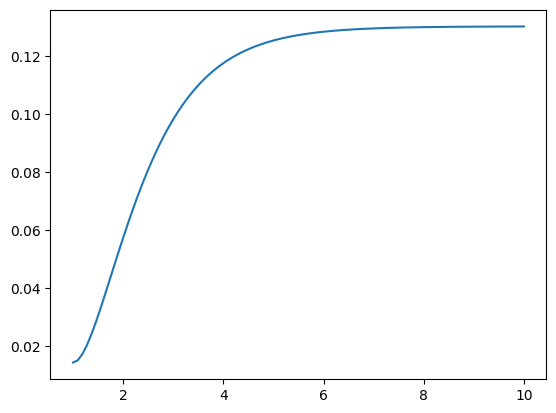

In [51]:
p = { 
    'kD_j' : 1.,
    'ED50_j' : 5000,
    'beta_j' : 2.
    }

liste = []
#x = np.arange(0,5,0.1)
x = np.linspace(1,10,100)
for ed in x:
    p['beta_j'] = ed
    res = f.simulator(p)
    liste.append(f.loss(res,f.data))

fig,ax = plt.subplots()
ax.plot(x,liste)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(0.0279078536361915), 'ED50_j': np.float64(577.1960548933472), 'beta_j': np.float64(1.7572161585700605)}


c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


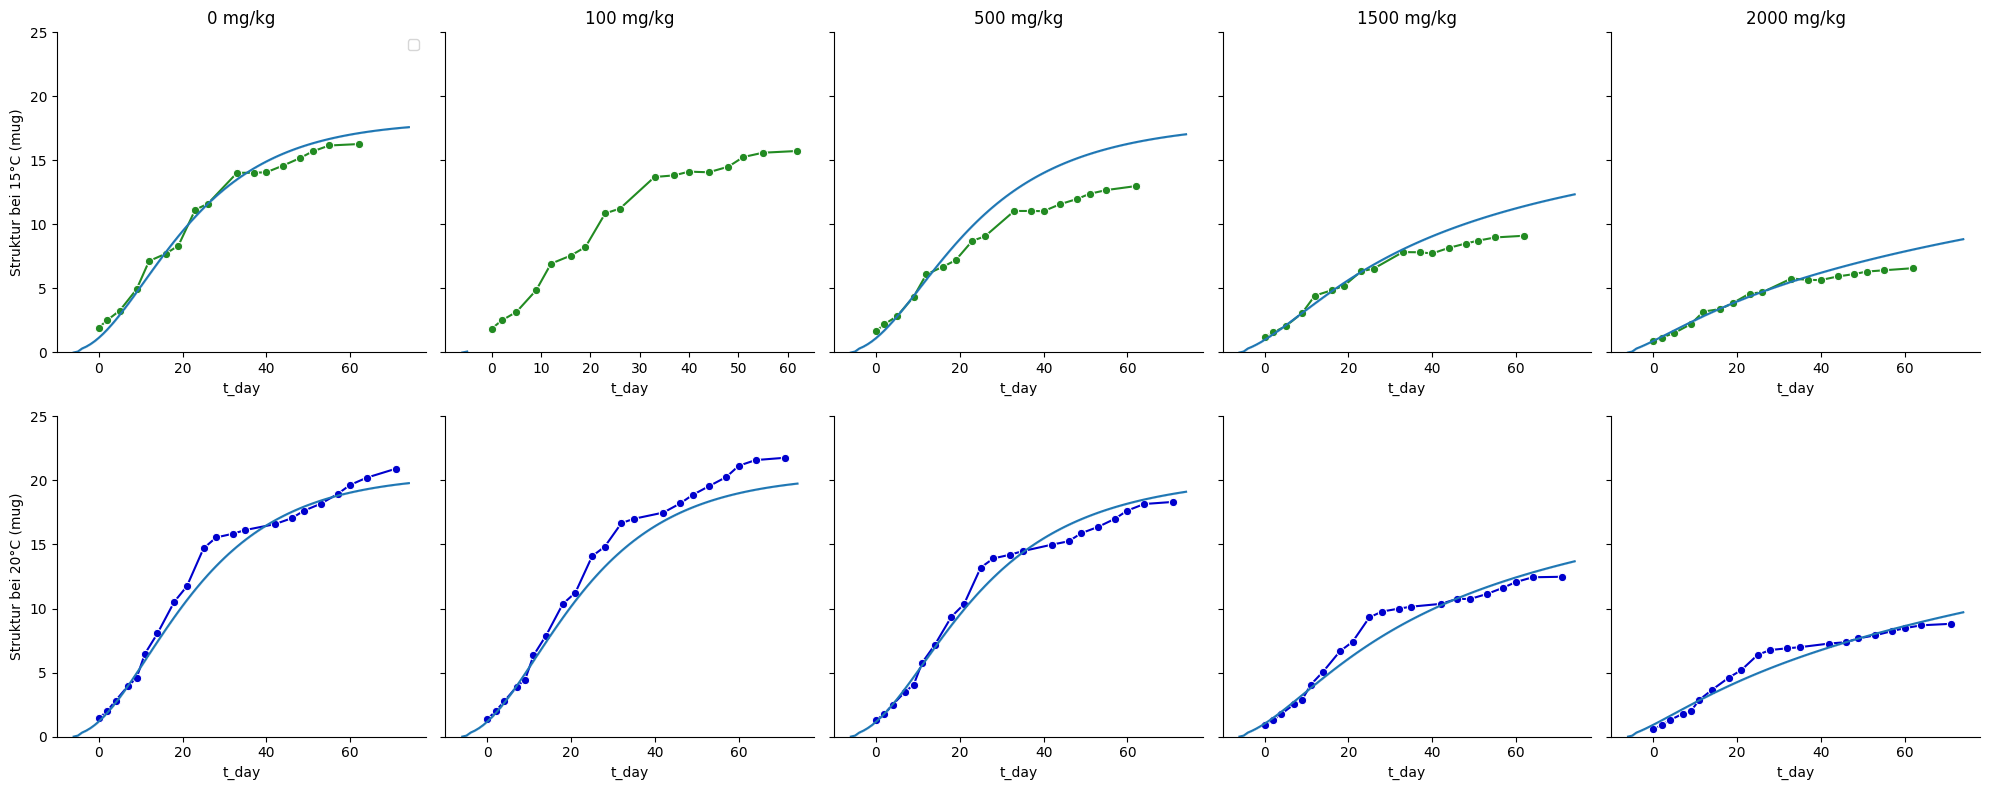

In [7]:
f = fit_model()

In [8]:
d = setup_modelfit("M")
d.define_lognorm_prior(sigma=0.5)
d.prior_predictive_check()

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: xlabel='kD_j', ylabel='Prior density'>,
        <Axes: xlabel='ED50_j'>, <Axes: xlabel='beta_j'>], dtype=object))

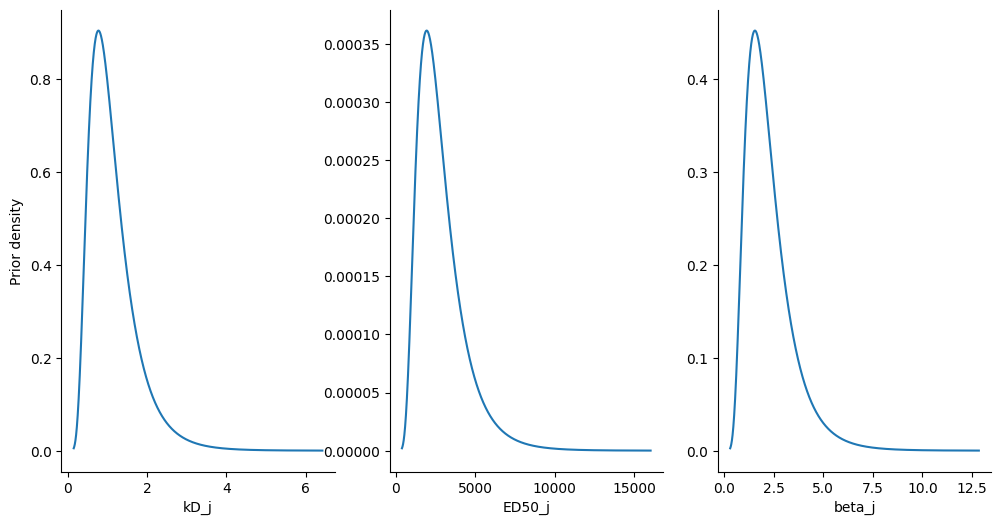

In [9]:
d.plot_priors()

In [10]:
d.run_bayesian_inference(
    popsize = 50,
    max_total_nr_simulations=100
)

c:\Users\ellar\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC.History INFO: Start <ABCSMC id=7, start_time=2025-03-06 09:49:25>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 6.57592112e-02.
c:\Users\ellar\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC INFO: Accepted: 50 / 111 = 4.5045e-01, ESS: 5.0000e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=7, duration=0:01:55.715054, end_time=2025-03-06 09:51:21>


Conducted Bayesian inference using SMC-ABC. Results are in `abc_history` and `accepted`


In [11]:
d.posterior_sample()

{'kD_j': 0.844281464138422,
 'ED50_j': 2457.7975097515864,
 'beta_j': 1.7255389515000052}

In [12]:
d.retrodict()
#d.retrodictions

In [67]:
sol = d.retrodictions

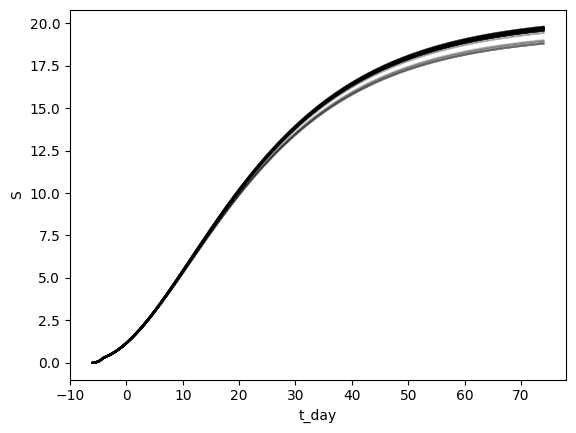

In [111]:
fig,ax = plt.subplots()

for i in range(30):
    sol_neu = sol[i][sol[i]['T_cels'] == 20]
    sol_neu = sol_neu[sol_neu['C_W'] == 100]

    sns.lineplot(data = sol_neu,x='t_day',y='S',alpha=0.2,color='black')

In [ ]:
 for (temp,T_cels) in enumerate(sim.T_cels.unique()):

        for (i,C_W) in enumerate(sim.C_W.unique()):
            df = sim.loc[(sim.C_W == C_W) & (sim.T_cels == T_cels)]
            sns.lineplot(df, x = 't_day', y = 'S', ax = ax[temp,i])

In [ ]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20,8), sharey = True)

for (i,C_W) in enumerate(data.C_W.unique()):

    ax[0,i].set(title = f'{C_W} mg/kg')
    obs = data.loc[lambda df : df.C_W==C_W]

    sns.lineplot(obs.loc[obs['T_cels']==15], x = 't_day', y = 'S', ax = ax[0,i], marker = 'o', color = 'forestgreen')
    sns.lineplot(obs.loc[obs['T_cels']==20], x = 't_day', y = 'S', ax = ax[1,i], marker = 'o', color = 'mediumblue')
    
ax[0,0].legend()
[a.legend().remove() for a in np.ravel(ax)[1:]]
ax[0,0].set_ylim(0, 25)
ax[0,0].set(ylabel = "Struktur bei 15°C (mug)")
ax[1,0].set(ylabel = "Struktur bei 20°C (mug)")

sns.despine()
plt.tight_layout()